In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from pydataset import data

# 1 <br>
Load the tips dataset from either pydataset or seaborn.

In [ ]:
df = data('tips')
df.head()

In [ ]:
df.shape

# 2 <br>
Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [ ]:
# Create the variables
x = df[['total_bill']]
y = df['tip']

# Create the object
model = LinearRegression().fit(x,y)

# Use the object
predictions = model.predict(x)

# Add columns to df for predictions and baseline predictions
df['yhat_baseline'] = y.mean() # This gives a baseline without features (columns)
df['yhat'] = predictions # This is what our model predicts given x

df.head()

# 3 <br>
Plot the residuals for the linear regression model that you made.

In [ ]:
# color = color of the line (the solid line, not the transparent area)
# alpha = opacity of the line
# lw = width of the line
ax = sns.lmplot(y='tip', x='total_bill', data=df, line_kws={'color':'red', 'alpha':0.5, 'lw':1})
ax.set(ylabel='Tip Amount ($)', xlabel='Total Amount ($)')

In [ ]:
# Plot the residuals
ax1 = sns.residplot(y='tip', x='total_bill', data=df)
ax1.set(ylabel='Tips ($)', xlabel='Total Bill ($)')

# 4 <br>
Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [ ]:
# from sklearn.metrics import mean_squared_error

In [ ]:
#MSE2
mse2 = mean_squared_error(y, df.yhat)
# Alternative method
# MSE2 = SSE / Len(df)
print(f"MSE^2 is {round(mse2, 2)}")

In [ ]:
#SSE, sum of squared error
# example: SSE2 = mean_squared_error(df.y, df.yhat)*len(df)
sse2 = mean_squared_error(y, df.yhat)*len(df)

# Alternative method
#sse = mse2 * len(df)
#sse = sum((df.yhat - y) **2)

print('SSE is ', sse2)

In [ ]:
# ESS
# ESS = sum((df.yhat - df.y.mean())**2)
# alternative method:
# TSS = ESS + SSE

ess = sum((df.yhat -y.mean())**2)
print('ESS is  ',ess)

In [ ]:
# TSS
# TSS = ESS + SSE
tss = ess + sse2
print('TSS is ',tss)

# 5 <br>
Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [ ]:
# SSE baseline
sse_baseline = sum((df.yhat_baseline - y) **2)
print('SSE is ', sse_baseline)

In [ ]:
# MSE for the baseline
mse2_baseline = mean_squared_error(y, df.yhat_baseline)
print(f"MSE^2 is {round(mse2_baseline, 2)}")

In [ ]:
# RMSE
# RMSE2 = sqrt(mean_squared_error(df.y, df.yhat))

rmse_baseline = mse2_baseline ** 0.5
print('RMSE is  ',rmse_baseline)

# 6 <br>
Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [ ]:
def compare_sse(sse, sse_baseline):
    if sse < sse_baseline:
        print('Our model is better than the baseline')
    
    else:
        print('The baseline is better than our model')

compare_sse(sse, sse_baseline)

# 7 <br>
What is the amount of variance explained in your model?

In [ ]:
print(f"The variance explained by our model is {round(r2_score(y, df.yhat),3)}")

# 8 <br>
Is your model better than the baseline model?

In [ ]:
r2 = r2_score(y, df.yhat)
r2_baseline = r2_score(y, df.yhat_baseline)
print('Our model is better than the baseline: ', r2 > r2_baseline)

# 9 <br>
Create a file named evaluate.py that contains the following functions. <br>
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from pydataset import data

df = data('tips')

# Create the variables
x = df[['total_bill']]
y = df['tip']

# Create the object
model = LinearRegression().fit(x,y)
# Use the object
predictions = model.predict(x)
# Add columns to df for predictions and baseline predictions
df['yhat_baseline'] = y.mean() # This gives a baseline without features (columns)
df['yhat'] = predictions # This is what our model predicts given x

# MSE2
mse2 = mean_squared_error(y, df.yhat)
print('MSE is ',round(mse2,2))

# RMSE
rmse = mse2 ** 0.5
print('RMSE is  ',round(rmse,2))

# SSE, sum of squared error
sse2 = mean_squared_error(y, df.yhat)*len(df)
print('SSE is ',round(sse2,2))

# ESS
ess = sum((df.yhat -y.mean())**2)
print('ESS is ',round(ess,2))

# SSE, sum of squared error
sse2_baseline = mean_squared_error(y, df.yhat_baseline)*len(df)
print('Baseline SSE is ',round(sse2_baseline,2))

# MSE2
mse2_baseline = mean_squared_error(y, df.yhat_baseline)
print('Baseline MSE is ',round(mse2_baseline,2))

# RMSE
rmse_baseline = mse2_baseline ** 0.5
print('Baseline RMSE is  ',round(rmse_baseline,2))

print('')
print('The model is better than the baseline: ', rmse < rmse_baseline)

print('')
print('')
print('Plot of Residuals')
ax1 = sns.residplot(y='tip', x='total_bill', data=df)
ax1.set(ylabel='Tips ($)', xlabel='Total Bill ($)')

In [ ]:
def plot_residuals (x, y):
    '''This function takes x column and y column as arguments. It creates a plot of residuals.'''
    ax1 = sns.residplot(y='tip', x='total_bill', data=df)
    ax1.set(ylabel='Tips ($)', xlabel='Total Bill ($)')
    return

x = df.total_bill
y = df.tip

plot_residuals(x, y)

In [ ]:
def regression_errors(y, yhat):
    '''This functions takes y and yhat and returns regression error values.'''

    # MSE2
    mse2 = mean_squared_error(y, df.yhat)
    print('MSE is ',round(mse2,2))

    # RMSE
    rmse = mse2 ** 0.5
    print('RMSE is  ',round(rmse,2))

    # SSE, sum of squared error
    sse2 = mean_squared_error(y, df.yhat)*len(df)
    print('SSE is ',round(sse2,2))

    # ESS
    ess = sum((df.yhat -y.mean())**2)
    print('ESS is ',round(ess,2))

    return mse2, rmse, sse2, ess




y = df['tip']
yhat = df['yhat']
regression_errors(y, yhat)

In [ ]:
def baseline_mean_errors(y):
    '''This function takes in y column and returns the error statistics.'''

    baseline = y.mean()
    residuals = baseline - y
    residuals_squared = sum(residuals**2)
    
    SSE = residuals_squared
    
    MSE = SSE/len(y)
    
    RMSE = MSE ** 0.5
    
    d =  {'SSE': [round(SSE,2)],
      'MSE': [round(MSE,2)],
      'RMSE': [round(RMSE,2)]}
    
    baseline_errors_df=pd.DataFrame(d,index=['Baseline Reggression Errors'])
    return baseline_errors_df.T


y= df['tip']
baseline_mean_errors(y)

In [ ]:
import sklearn

def better_than_baseline(y,yhat):
    baseline = y.mean()
    residuals_baseline = baseline - y
    residuals_squared_baseline = sum(residuals_baseline**2)
    SSE_baseline = residuals_squared_baseline
    
    MSE_baseline = SSE_baseline/len(y)
    
    RMSE_baseline = MSE_baseline ** 0.5
    
    residuals = yhat - y
    residuals_squared = sum(residuals**2)
    SSE = residuals_squared
    
    MSE = sklearn.metrics.mean_squared_error(y,yhat)
    
    RMSE = (sklearn.metrics.mean_squared_error(y,yhat)) ** 0.5
    
    if RMSE < RMSE_baseline:
        return True
    else: 
        return False

y=df.tip
yhat=df.yhat

better_than_baseline(y, yhat)

# 10 <br>
Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [2]:
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
x = mpg['displ']
y = mpg['hwy']

mpg['yhat_baseline'] = mpg['hwy'].mean()

In [4]:
# generate parameters, i.e. create model
ols_model = LinearRegression().fit(mpg[['displ']], mpg[['hwy']])

# compute predictions and add to original dataframe
mpg['yhat'] = ols_model.predict(mpg[['displ']])

In [5]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat_baseline,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.440171,29.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,23.440171,29.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,23.440171,28.636473
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,23.440171,28.636473
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,23.440171,25.812002


In [6]:
import evaluate

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


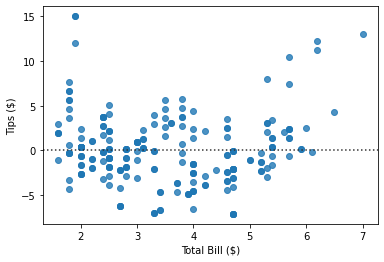

In [7]:
evaluate.plot_residuals(x, y)